**NOTE**

1. I have used `polars` library to do data analysis.
2. I have used `plotly` for plotting, thats why you can't see the plots. (maybe 😲)
3. I can't reproduce the last section because that code is too old and I have modified that code's modules
   `from yt_history import io`.


In [3]:
import calendar
import datetime
import typing as t

import numpy as np
import plotly.express as px
import polars as pl
from frontend.youtube import IngestYtHistory
from matplotlib import pyplot as plt

In [2]:
df = IngestYtHistory.from_ingested_data()
df.head()

title,titleUrl,time,fromYtSearchHistActivity,fromYtWatchHistActivity,fromWebAppActivity,videoId,channelTitle,channelId,year,month,weekday,hour,isShorts,titleTags,titleEmojis,contentType
str,str,"datetime[μs, UTC]",bool,bool,bool,str,str,str,i64,i64,i64,i64,bool,list[str],list[str],str
"""I Made a 3D Op…","""https://youtu.…",2023-11-14 03:37:19.642 UTC,false,true,false,"""rJuRTZOE99g""","""Recursion""","""UCuHB_2AOt8vju…",2023,11,2,3,false,[],[],"""News"""
"""The EU Will Br…","""https://youtu.…",2023-11-14 03:33:58.802 UTC,false,true,false,"""Hod69Y1aVlY""","""TechLinked""","""UCeeFfhMcJa1kj…",2023,11,2,3,false,[],[],"""News"""
"""Why are Rajast…","""https://youtu.…",2023-11-14 03:19:08.026 UTC,false,true,false,"""_GkAzfDD-uc""","""Soch by Mohak …","""UCz4a7agVFr1Tx…",2023,11,2,3,false,[],[],"""News"""
"""Google is payi…","""https://youtu.…",2023-11-14 03:11:42.709 UTC,false,true,false,"""3K9miZLIBfg""","""Tech Junkies""","""UCn4fhtzOgtoEK…",2023,11,2,3,false,[],[],"""News"""
"""GitHub Univers…","""https://youtu.…",2023-11-13 18:27:21.868 UTC,false,true,false,"""h_o9kFPVeiw""","""GitHub""","""UC7c3Kb6jYCRj4…",2023,11,1,18,false,[],[],"""Programming"""


## Basic Insights


### Time range of Data


In [12]:
maxt: datetime.datetime = df["time"].max()  # type: ignore
mint: datetime.datetime = df["time"].min()  # type: ignore

f"{mint:%b, %y} to {maxt:%b, %y}"

'Jul, 22 to Nov, 23'

In [5]:
df["time"].dt.date().n_unique()

468

### Frequently Watched Channel


In [65]:
freq_ch_num = df["channelName"].value_counts().filter(pl.col("counts") > 7).height
freq_ch_num

10

In [ ]:
px.pie(
    values=[freq_ch_num, df.height - freq_ch_num],
    names=["Frequently Watched Channel", "Non Freq. Channel"],
    title="No. of Channels you watches frequently.",
).update_layout(title_x=0.5)

### Top 7 Channel


In [ ]:
temp = df["channelName"].value_counts(sort=True).head(7)
px.bar(temp, "channelName", "counts")

### ContentType Frequency Plot


In [ ]:
temp = df["contentType"].value_counts(sort=True)
px.bar(temp, "contentType", "counts")

### Count Of Video Watched From Different Activity


In [ ]:
temp = df.select(
    "fromYtSearchHistActivity", "fromYtWatchHistActivity", "fromWebAppActivity"
).sum()
px.pie(values=temp.row(0), names=temp.columns)

### Video watch frequency


In [112]:
TimeFreqStr = t.Literal["weekday", "hour", "month", "year"]


def heatmap_with_pivot_table(df: pl.DataFrame, index: TimeFreqStr, column: TimeFreqStr):
    if index == column:
        raise ValueError("index != column")

    heatmap_data = (
        df.pivot("titleUrl", index, column, "count", sort_columns=True)
        .drop(index)
        .fill_null(0)
    )

    fig = px.imshow(
        heatmap_data,
        labels={"x": column.capitalize(), "y": index.capitalize()},
        color_continuous_scale="YlGnBu",
        text_auto=True,
        height=700,
    )
    fig.update_layout(title_x=0.33)

    if column == "weekday":
        fig.update_layout(
            xaxis={
                "tickmode": "array",
                "tickvals": np.arange(1, 8),
                "ticktext": np.array(calendar.day_name),
            }
        )
    elif column == "month":
        fig.update_layout(
            xaxis={
                "tickmode": "array",
                "tickvals": np.arange(1, 13),
                "ticktext": np.array(calendar.month_name),
            }
        )

    return fig

In [ ]:
# I have used `plotly`, thats why you can't see the plots 😲
fig = heatmap_with_pivot_table(df, "hour", "weekday")
fig = heatmap_with_pivot_table(df, "hour", "year")
fig

In [83]:
df.pivot("titleUrl", "month", "weekday", "count").drop("month").fill_null(0)

5,4,1,7,6,3,2
u32,u32,u32,u32,u32,u32,u32
245,44,304,297,164,51,38
0,0,30,81,0,0,44


## WordCloud from Video Title


In [4]:
import wordcloud
from sklearn.feature_extraction.text import TfidfVectorizer

# I have removed this code from my repo (this is too old 😵‍💫)
from yt_history import io

In [ ]:
vectorizer: TfidfVectorizer = io.load_object(C.CONTENT_TYPE_VEC_PATH)  # noqa: F821

In [6]:
preprocessor = vectorizer.build_preprocessor()

In [7]:
tokens = [preprocessor(s) for s in df["title"]]
tokens[:5]

['i made a 3d oper system',
 'the eu will break appl',
 'whi are rajasthani unemploy',
 'googl is pay samsung good news for android user',
 'github univers 2023 day 2 keynot the product platform for all develop']

In [16]:
cloud = wordcloud.WordCloud(
    width=800,
    height=800,
    stopwords=wordcloud.STOPWORDS,
    min_font_size=10,
).generate(" ".join(tokens))

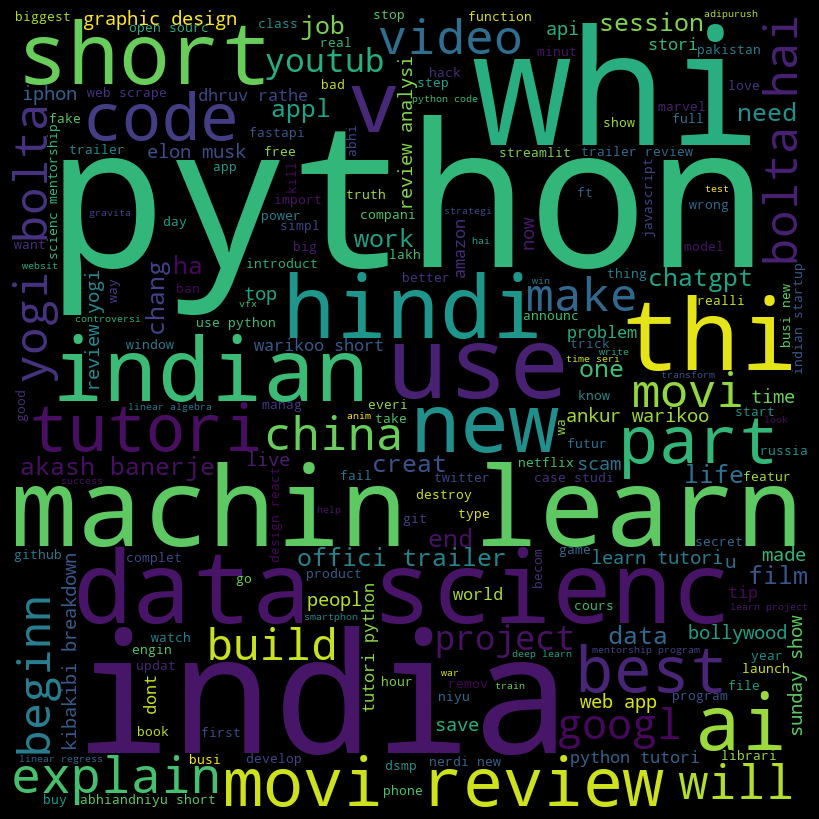

In [19]:
plt.figure(figsize=(8, 12), facecolor=None)
plt.imshow(cloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()